In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [1]:
# df=pd.read_csv("/content/data_csv.csv")
# df

In [2]:
df = pd.read_csv(r"C:\Users\Deniz\Desktop\data\data_csv.csv")
df

NameError: name 'pd' is not defined

In [ ]:
df_c=df.drop('code project',axis=1)

In [ ]:
df_c.info()

In [ ]:
df_c.isnull().sum()

In [ ]:
df_c.describe()

In [3]:
df_c['Length(km)'].hist(figsize=(5,5),xlabelsize=(10),color = 'green')
plt.show()

NameError: name 'df_c' is not defined

In [4]:
df_c['Type of road'].hist(figsize=(8,5),xlabelsize=(8),color = 'green')
plt.show()

NameError: name 'df_c' is not defined

In [5]:
df_c['constructed road Type'].hist(figsize=(5,5),color = 'green')
plt.show()

NameError: name 'df_c' is not defined

In [6]:
df_c["Number Line"].hist(figsize=(5,5),color = 'green')
plt.show()

NameError: name 'df_c' is not defined

In [ ]:
df_c["width road(m)"].hist(figsize=(5,5),color = 'green')
plt.show()

In [7]:
df_c["slope land%"].hist(figsize=(5,5),color = 'green')
plt.show()

NameError: name 'df_c' is not defined

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(df_c['Cost Estimation(milion_rials)'], color='black');

NameError: name 'plt' is not defined

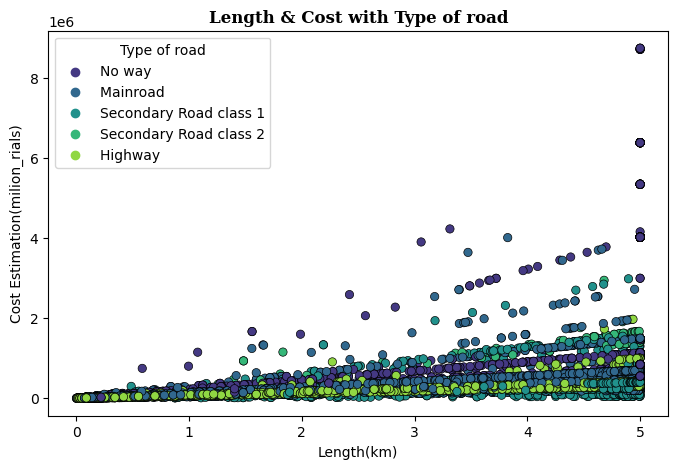

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c["Type of road"] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with Type of road' , fontfamily='Serif' , fontweight='bold');

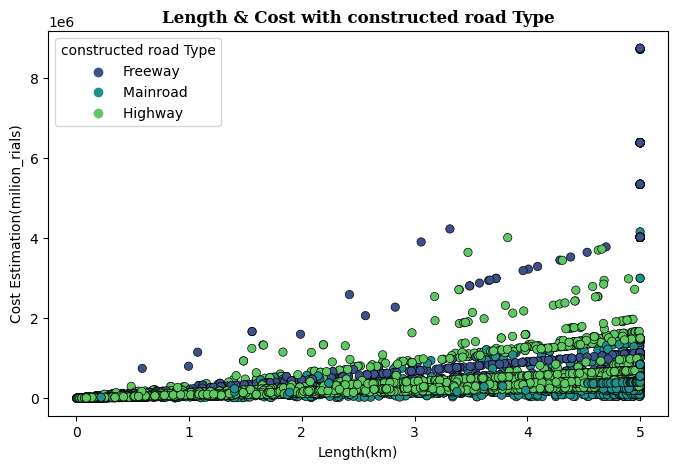

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['constructed road Type'] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with constructed road Type' , fontfamily='Serif' , fontweight='bold');

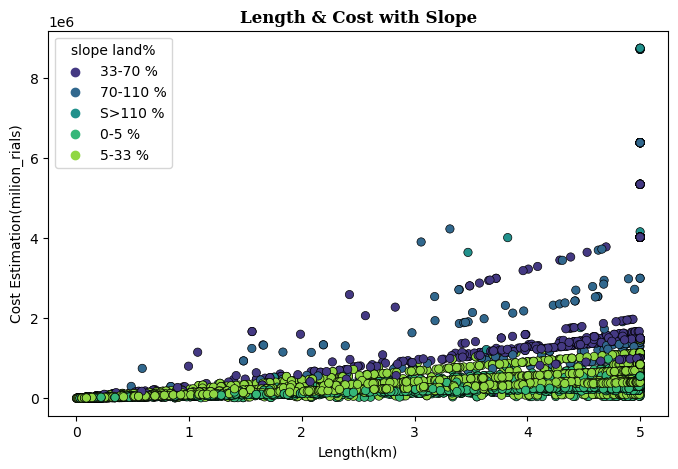

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['slope land%'] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with Slope' , fontfamily='Serif' , fontweight='bold');

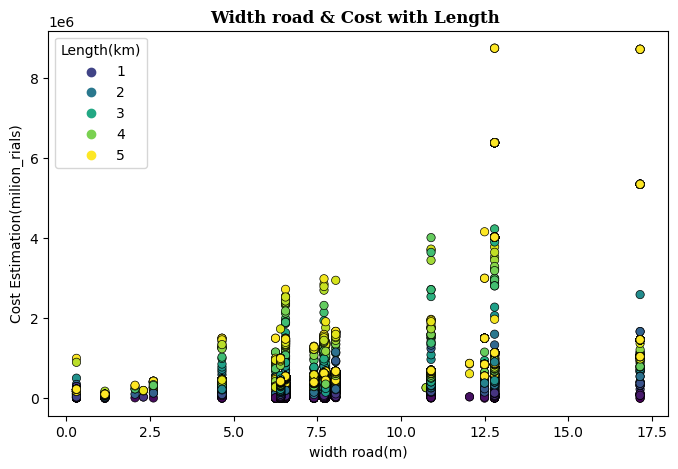

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['width road(m)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['Length(km)'] ,
                palette='viridis' , ec='k');
plt.title('Width road & Cost with Length ' , fontfamily='Serif' , fontweight='bold');

<Figure size 800x500 with 0 Axes>

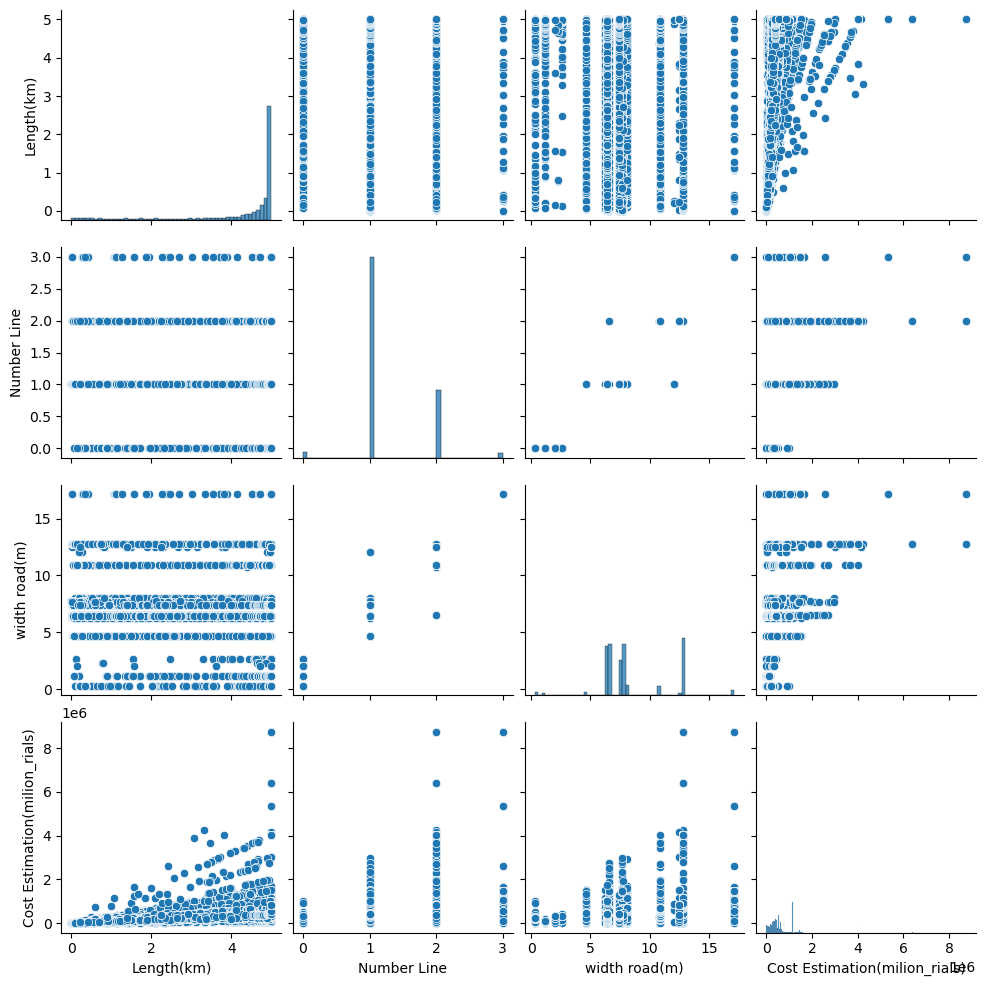

In [20]:
plt.figure(figsize=(8,5))
sns.pairplot(df_c)


In [21]:
df_c=df_c.drop_duplicates(subset="Cost Estimation(milion_rials)")
df_c

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
0,5.000000,No way,Freeway,2,12.80,33-70 %,4.027500e+06
21,5.000000,No way,Freeway,3,17.15,33-70 %,5.351250e+06
31,5.000000,No way,Freeway,3,17.15,70-110 %,8.726250e+06
32,5.000000,No way,Mainroad,1,6.25,33-70 %,7.500000e+05
37,0.993974,No way,Freeway,2,12.80,33-70 %,8.006457e+05
...,...,...,...,...,...,...,...
25289,4.989205,Secondary Road class 1,Mainroad,1,7.40,5-33 %,3.991364e+05
25291,0.218490,No way,Mainroad,2,12.50,0-5 %,2.414313e+04
25292,1.401865,No way,Mainroad,2,12.50,0-5 %,1.549060e+05
25299,1.401865,No way,Mainroad,2,12.50,5-33 %,2.369151e+05


In [22]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
#catatt=['Type roadway','constructed road type','slope land%']

df_c['Type of road']=lb.fit_transform(df_c['Type of road'])

df_c['slope land%']=lb.fit_transform(df_c['slope land%'])

df_c['constructed road Type']=lb.fit_transform(df_c['constructed road Type'])

In [23]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
liNum=['Length(km)','width road(m)']
df_c[liNum]=sc.fit_transform(df_c[liNum])

df_c

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
0,0.785386,2,0,2,3.142534,1,4.027500e+06
21,0.785386,2,0,3,5.582537,1,5.351250e+06
31,0.785386,2,0,3,5.582537,3,8.726250e+06
32,0.785386,2,2,1,-0.531495,1,7.500000e+05
37,-1.988066,2,0,2,3.142534,1,8.006457e+05
...,...,...,...,...,...,...,...
25289,0.777913,3,2,1,0.113564,2,3.991364e+05
25291,-2.524949,2,2,2,2.974258,0,2.414313e+04
25292,-1.705675,2,2,2,2.974258,0,1.549060e+05
25299,-1.705675,2,2,2,2.974258,2,2.369151e+05


In [24]:
df_c.corr()

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
Length(km),1.000000,0.046291,-0.039390,-0.062648,-0.038772,-0.039243,0.491308
Type of road,0.046291,1.000000,0.267938,-0.109819,0.243848,0.030973,0.096394
constructed road Type,-0.039390,0.267938,1.000000,-0.306474,-0.269609,0.094945,-0.321909
Number Line,-0.062648,-0.109819,-0.306474,1.000000,0.910553,-0.014516,0.290326
width road(m),-0.038772,0.243848,-0.269609,0.910553,1.000000,-0.016396,0.329243
slope land%,-0.039243,0.030973,0.094945,-0.014516,-0.016396,1.000000,0.190408
Cost Estimation(milion_rials),0.491308,0.096394,-0.321909,0.290326,0.329243,0.190408,1.000000


<Axes: >

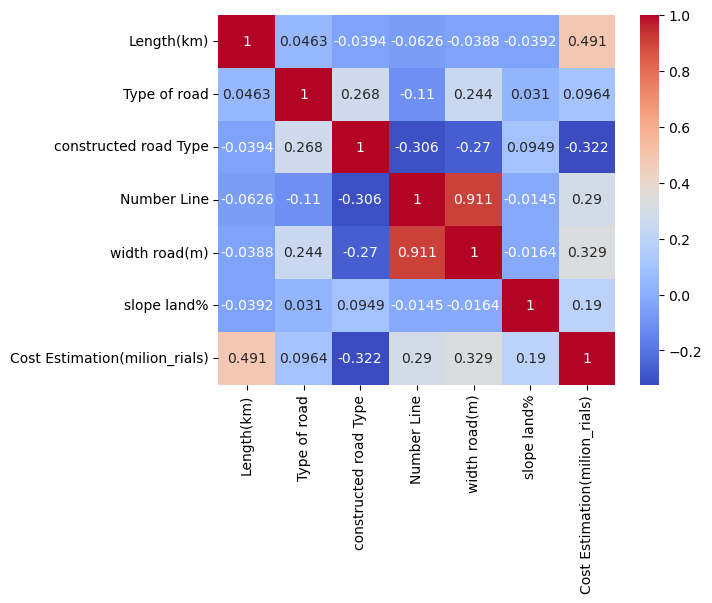

In [25]:
import seaborn as sns

sns.heatmap(df_c.corr(),cmap='coolwarm',annot=True,  linewidth=0,fmt='0.3g')

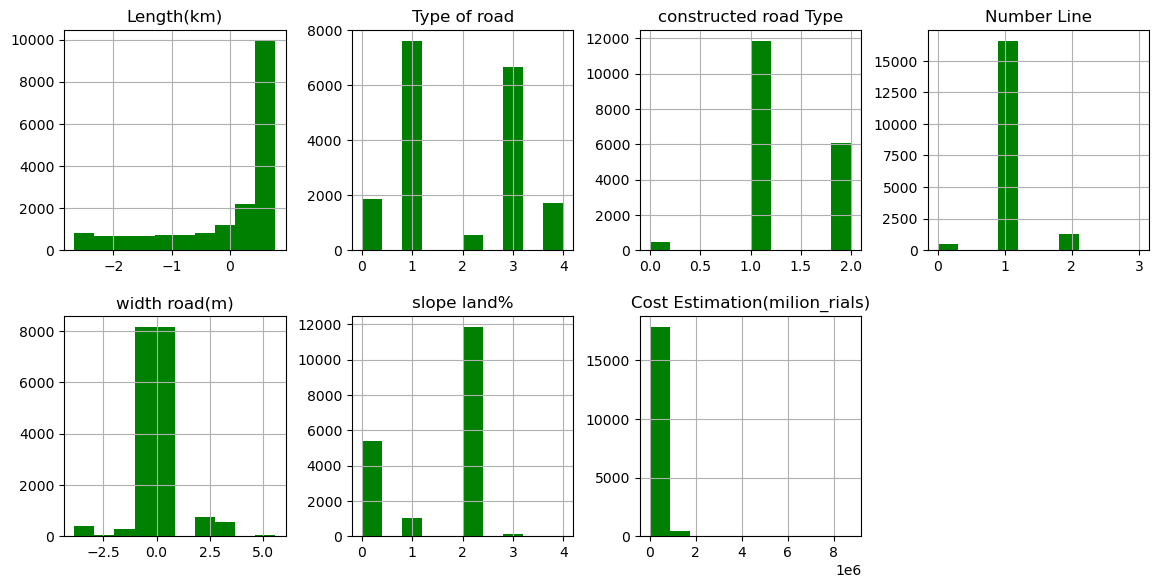

In [26]:
df_c.hist(figsize = (14,14), layout = (4,4), color = "green")
plt.show()

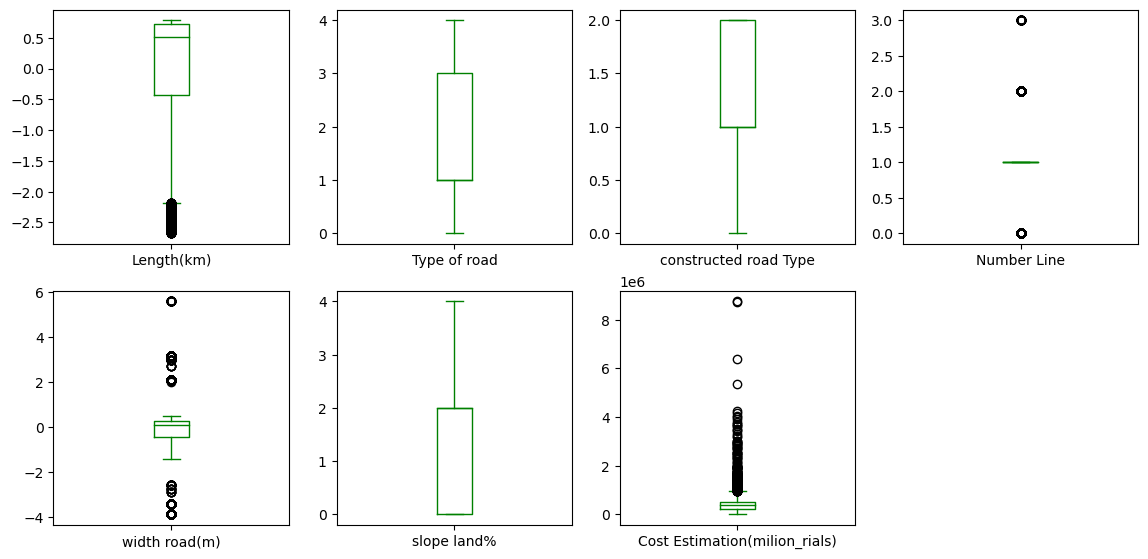

In [27]:
df_c.plot(kind='box',subplots=True,figsize = (14,14), layout = (4,4), color = "green")
plt.show()

In [28]:
Y = df_c['Cost Estimation(milion_rials)']

X = df_c.drop('Cost Estimation(milion_rials)',axis=1)
X.shape

(18395, 6)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc_Y = StandardScaler()
Y_c = sc_Y.fit_transform(np.array(Y).reshape(-1 , 1))
Y_c

array([[12.76723685],
       [17.41293663],
       [29.25749698],
       ...,
       [-0.82362915],
       [-0.53581833],
       [-0.03942739]])

In [30]:
#validation

from sklearn.model_selection import train_test_split

X_train,X_rest,Y_train,Y_rest=train_test_split(X,Y_c,test_size=0.3,
                                               random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=42)

In [31]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("Training Result")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("Testing Result")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [32]:
!pip install lightgbm
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm

# LigthGbm Model


In [33]:
import lightgbm as lgbm

model = lgbm.LGBMRegressor()

# تعیین گرید پارامترها
param_grid = {
    'max_depth': range(1,11),
    'learning_rate': [0.1,0.01,0.001,0.005],
    'n_estimators': range(100,1000,100),
     'num_leaves': range(10,100,5)

}

# ایجاد جستجوی گرید
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# آموزش جستجوی گرید با داده‌های آموزشی
grid_search.fit(X_train, Y_train)

# بهترین مدل
best_model = grid_search.best_estimator_

# مقادیر بهترین پارامترها
best_params = grid_search.best_params_

# ارزیابی مدل
accuracy = best_model.score(X_val, Y_val)

# چاپ بهترین پارامترها و دقت مدل
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

In [34]:
lgb = lgbm.LGBMRegressor(objective='regression',boosting_type= 'gbdt',
                              num_leaves=10,
                              learning_rate=0.1, 
                              n_estimators=900, 
                              max_depth=4,
                              metric='rmse')

lgb = lgb.fit(X_train , Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 12876, number of used features: 6
[LightGBM] [Info] Start training from score 0.000165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [35]:
y_train_pred = lgb.predict(X_train)
y_test_pred = lgb.predict(X_test)


print_evaluate(Y_train, y_train_pred, train=True)
print_evaluate(Y_test, y_test_pred, train=False)

Training Result
MAE:  0.034429460910179496
MSE:  0.01334992575136177
RMSE:  0.11554187877718525
R2 Square:  0.986899014396963
Testing Result
MAE:  0.0435425077129368
MSE:  0.026113267209158686
RMSE:  0.16159599997883203
R2 Square:  0.9735142914302912


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 12876, number of used features: 6
[LightGBM] [Info] Start training from score 0.000165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Max Depth: 1, RMSE: 0.5130533568674065
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 12876, number of used features: 6
[LightGBM] [Info] Start training from score 0.000165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 12876, number of used features: 6
[LightGBM] [Info] Start training from score 0.000165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

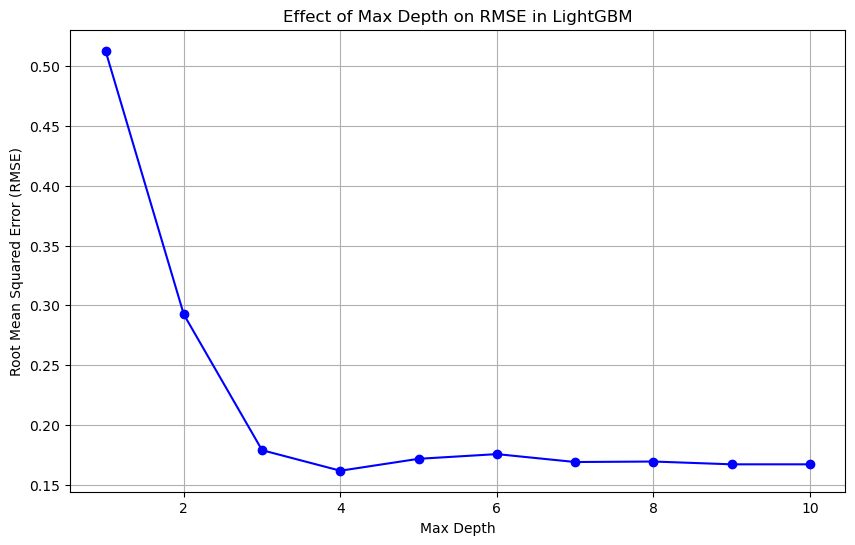

In [36]:
# لیستی از مقادیر مختلف max_depth برای آزمایش
max_depths = range(1, 11)
rmse_scores = []

# آموزش و ارزیابی مدل برای هر مقدار max_depth
for max_depth in max_depths:
    model = lgbm.LGBMRegressor(max_depth=max_depth,objective='regression',boosting_type= 'gbdt',
                              num_leaves=10,
                              learning_rate=0.1, 
                              n_estimators=900, 
                              metric='rmse')
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    rmse_scores.append(rmse)
    print(f"Max Depth: {max_depth}, RMSE: {rmse}")

# رسم نمودار max_depth در مقابل RMSE
plt.figure(figsize=(10, 6))
plt.plot(max_depths, rmse_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Effect of Max Depth on RMSE in LightGBM')
plt.grid(True)
plt.show()

In [37]:
y_predict_test =pd.DataFrame(y_test_pred)
y_predict_train =pd.DataFrame(y_train_pred)
y_test = pd.DataFrame(Y_test)
y_train = pd.DataFrame(Y_train)
y_test

,0
0,-0.805649
1,-0.271883
2,-1.226720
3,0.211847
4,-1.237330
...,...
2755,0.549189
2756,-0.642181
2757,-1.337449
2758,-1.242833


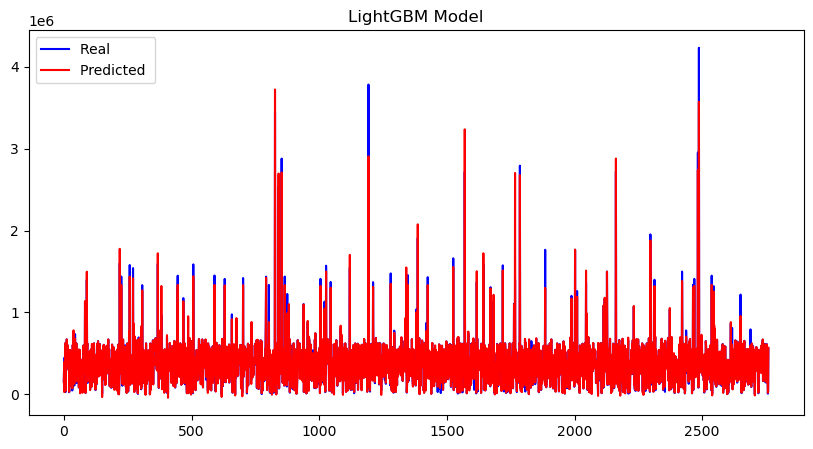

In [38]:
inv_y_test=sc_Y.inverse_transform(y_test)
inv_y_test_pred=sc_Y.inverse_transform(y_predict_test)
inv_y_train=sc_Y.inverse_transform(y_train)
inv_y_train_pred=sc_Y.inverse_transform(y_predict_train)

fig = plt.figure(figsize = (10,5))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_test_pred, color='r', label='Predicted ')
plt.legend()
plt.title("LightGBM Model")
plt.show()

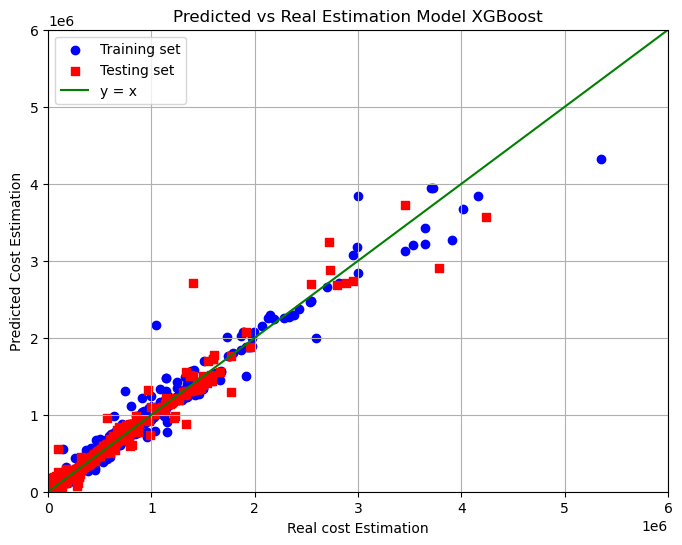

In [40]:
import matplotlib.pyplot as plt
import numpy as np


# ایجاد نمودار
plt.figure(figsize=(8, 6))

# داده‌های آموزش
plt.scatter(inv_y_train,inv_y_train_pred , color='blue', label='Training set', marker='o')

# داده‌های تست
plt.scatter(inv_y_test,inv_y_test_pred, color='red', label='Testing set', marker='s')

# خط y = x
x = np.linspace(min(Y), max(Y), 100)
plt.plot(x, x, color='green', label='y = x')

# تنظیمات نمودار
plt.xlabel('Real cost Estimation')
plt.ylabel('Predicted Cost Estimation')
plt.legend()
plt.grid(True)
plt.xlim(0, 6000000)
plt.ylim(0,6000000 )
plt.title('Predicted vs Real Estimation Model XGBoost')

# نمایش نمودار
plt.show()
